                                    RED WINE QUALITY PROJECT

In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
wQ=pd.read_csv('wine_Quality.csv')

In [3]:
#here i am displaying first 10 records using head function of dataframe 
wQ.head(10)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

                                    EXPLORATORYY DATA ANALYSIS(EDA)

In [4]:
wQ.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
        # all the data types of the feature are from numerical category

In [5]:
# coverting all the feature name in list format
wQ.columns.to_list()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [6]:
wQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#here the above output is showing detail information about the dataset like checking for no of null values or non null values in each feature and also the data type of each feature and so on 

In [7]:
#here i am performing statistical analysis of the data set
wQ.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

key observation:
based on the above statitical information we are getting useful statistical information about features 
fixed acidity -> here mean > median it means positive skewness is present in the feature ,there is no maximum jump from 3rd quartile to maximum so might not be outlier is present 
volatile acidity -> here mean and median are nearly clsoed so skewness is not present 
residual sugar -> there is high jump in this feature from 3rd quartile to max so chances of outlier 
total sulphur dioxide -> here it is also seen high jump from 3rd quaritle to max range so here more no of outliers are present ,also we have seen in this column that standard deviation is more so variance is more here (spread of data)


In [8]:
# here in the dataset 1599 records are present along with 12 feature out of which one is output feature
wQ.shape

(1599, 12)

In [9]:
#here i am finding total no of unique value in each column
for i in wQ.columns:
    print(
        wQ[i].nunique())


96
143
80
91
153
60
144
436
89
96
65
6


In [10]:
#here null value is not present in  any columns
wQ.isnull().sum() 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
for i in wQ.columns:
    
    print(wQ[i].value_counts())

fixed acidity
7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: count, Length: 96, dtype: int64
volatile acidity
0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: count, Length: 143, dtype: int64
citric acid
0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: count, Length: 80, dtype: int64
residual sugar
2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: count, Length: 91, dtype: int64
chlorides
0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: count, Length: 153, dtype: int64
free sulfur dioxide
6.0     138
5.0     104
10.0     79
15.0     78
12.0     75


In [16]:
#here in the above output value_counts() is used to check the frequenc of each value in the feature

<Axes: >

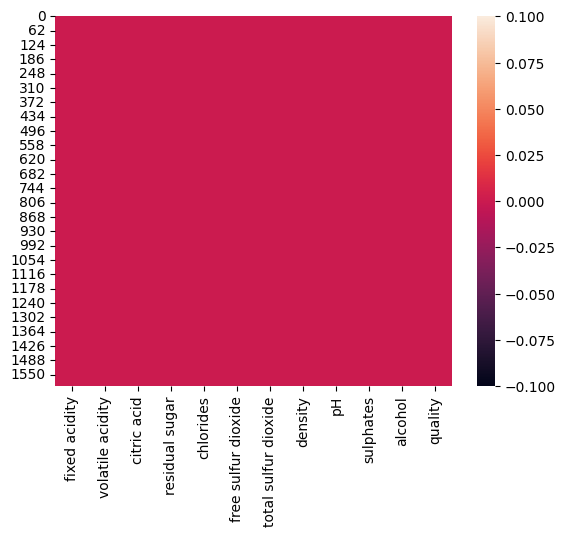

In [12]:
#checking  for null values for each column using heatmap()
sns.heatmap(wQ.isnull())

In [16]:
        # here from the color coding of heatmap() it clearly indicating there is no null value

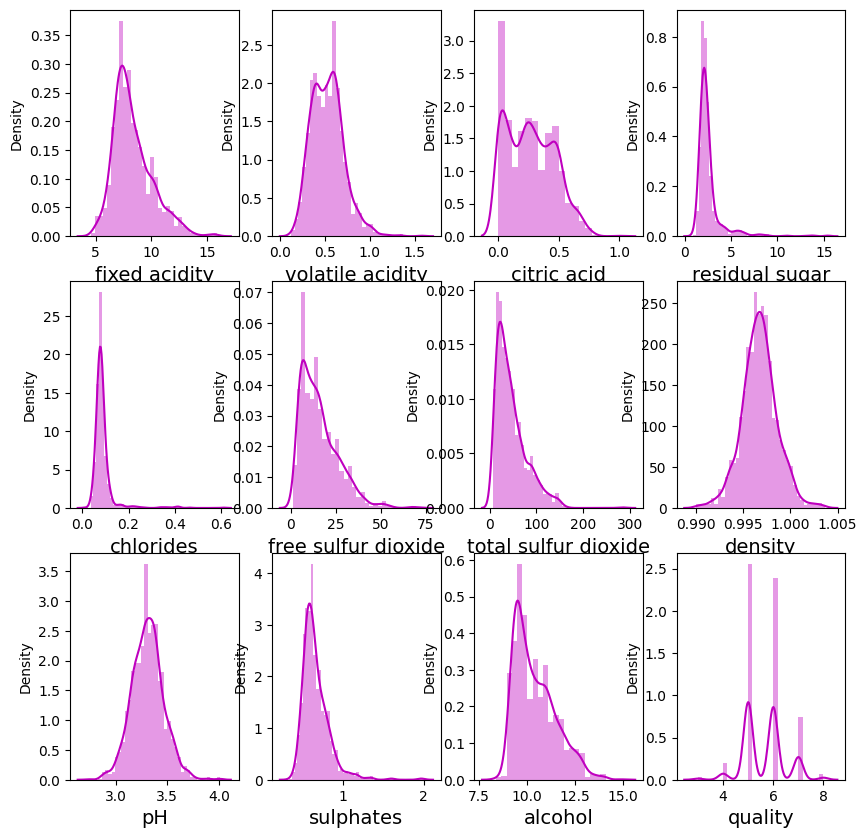

In [13]:
plt.figure(figsize=(10,10),facecolor='white')
counter=1
shape=wQ.shape # shape will give us the dimension 
n_col=shape[1] # at index 1 of dimention no of column is present and at 0 no of record is present 
for i in wQ.columns:
    if counter<=n_col:
        ax=plt.subplot(3,4,counter)
        sns.distplot(wQ[i],color='m')
        plt.xlabel(i,fontsize=14)
        plt.yticks(rotation=0,fontsize=10)
    counter+=1



here i have used distplot to show the distribution of data in each feature and from the observation it is clearly understood that in most of the feature data is normaly distributed and an in few feature skewness is present.
positive skewness is present in the dataset


In [ ]:
#performing univariate analysis for the feature 

<Axes: ylabel='Frequency'>

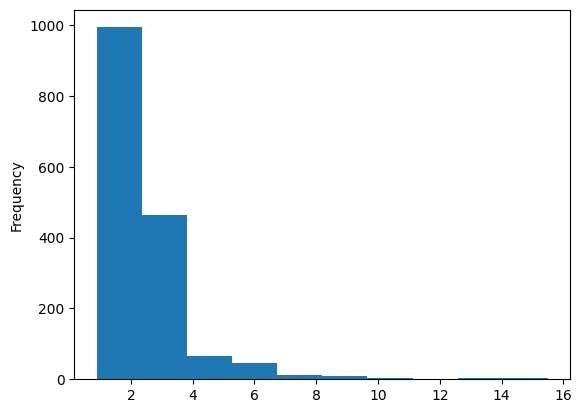

In [14]:
wQ['residual sugar'].plot.hist()

In [ ]:
# here in fixed acidity feature it is clearly observed that data is normally distributed and have positive skewness

<Axes: ylabel='Frequency'>

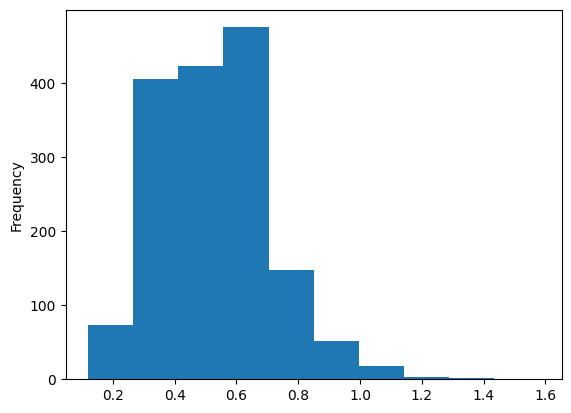

In [19]:
wQ['volatile acidity'].plot.hist()


<Axes: ylabel='Frequency'>

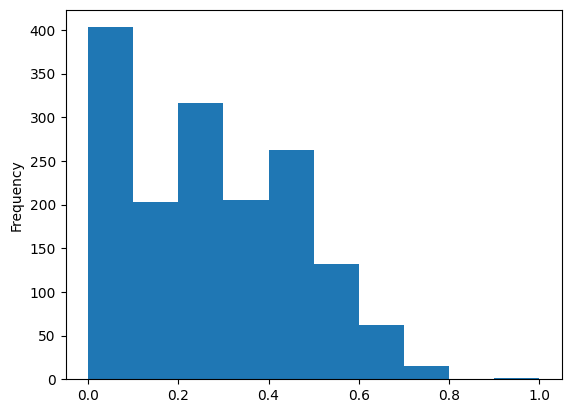

In [20]:
wQ['citric acid'].plot.hist()

<Axes: ylabel='Frequency'>

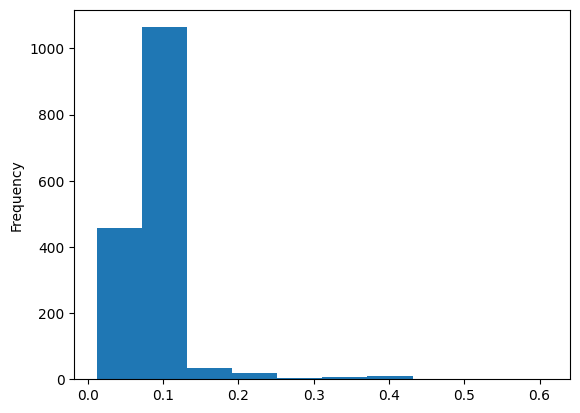

In [21]:
wQ['chlorides'].plot.hist()

<Axes: ylabel='Frequency'>

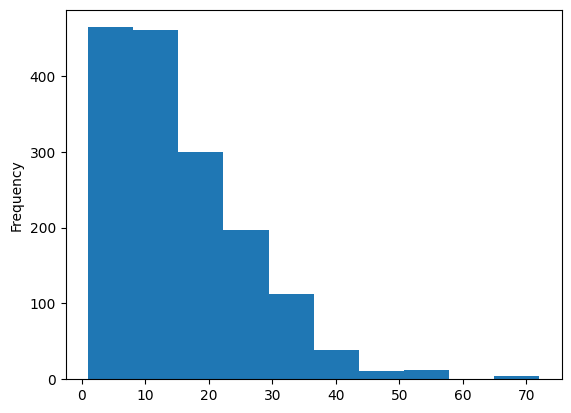

In [22]:
wQ[ 'free sulfur dioxide'].plot.hist()

<Axes: ylabel='Frequency'>

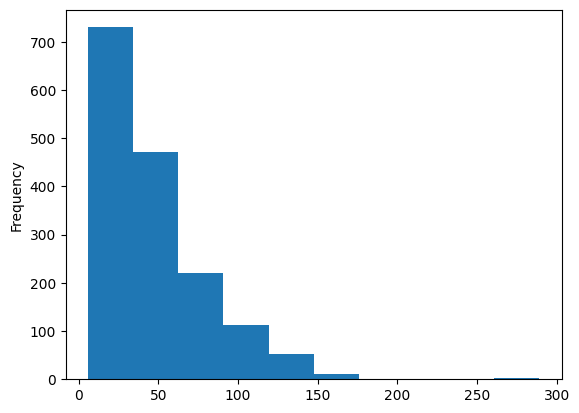

In [23]:
wQ[ 'total sulfur dioxide'].plot.hist()

In [15]:
dfwQ=wQ.corr()
dfwQ

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

<Axes: >

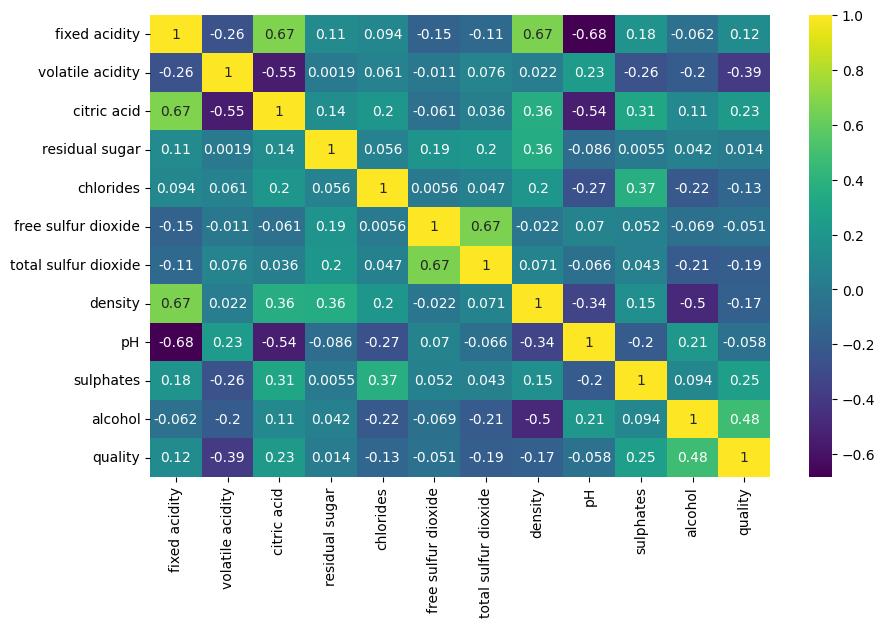

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(wQ.corr(),cmap='viridis',annot=True)

detecting outliers in individual columns

In [17]:
        wQ.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<Axes: >

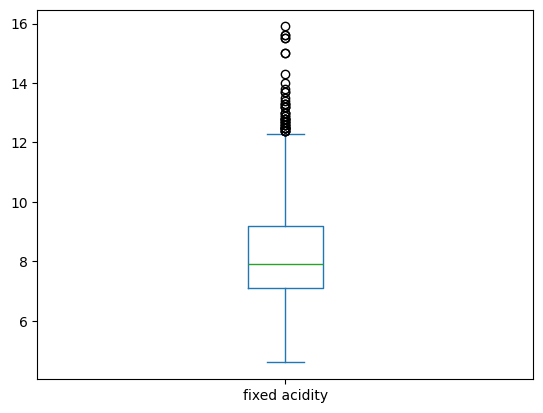

In [18]:
wQ['fixed acidity'].plot.box()

<Axes: >

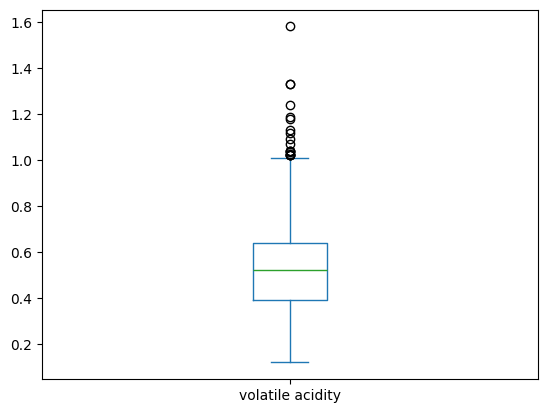

In [19]:
wQ['volatile acidity'].plot.box()

<Axes: >

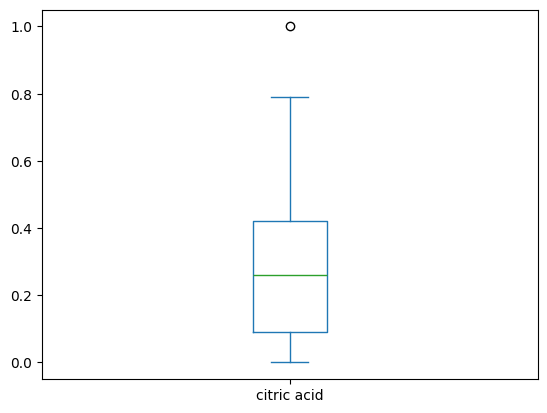

In [20]:
wQ['citric acid'].plot.box()

<Axes: >

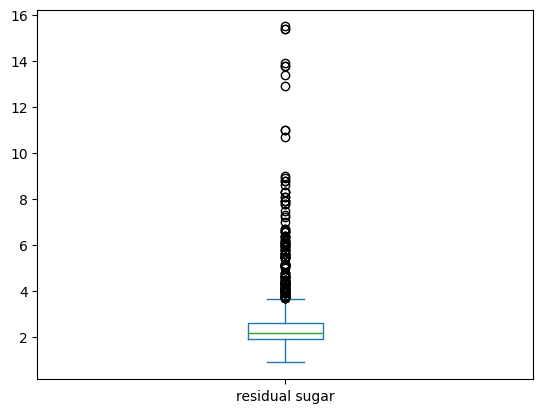

In [21]:
wQ['residual sugar'].plot.box()

<Axes: >

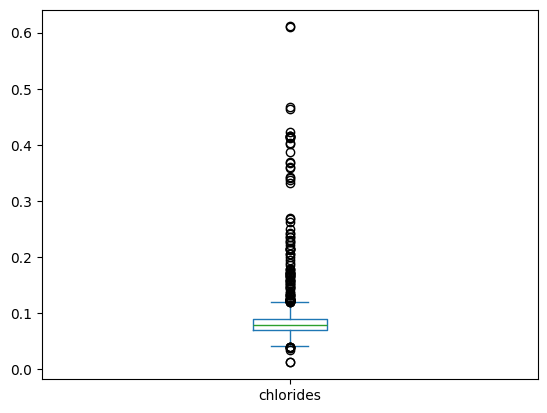

In [22]:
wQ['chlorides'].plot.box()

fixed acidity              Axes(0.125,0.53;0.110714x0.35)
volatile acidity        Axes(0.257857,0.53;0.110714x0.35)
citric acid             Axes(0.390714,0.53;0.110714x0.35)
residual sugar          Axes(0.523571,0.53;0.110714x0.35)
chlorides               Axes(0.656429,0.53;0.110714x0.35)
free sulfur dioxide     Axes(0.789286,0.53;0.110714x0.35)
total sulfur dioxide       Axes(0.125,0.11;0.110714x0.35)
density                 Axes(0.257857,0.11;0.110714x0.35)
pH                      Axes(0.390714,0.11;0.110714x0.35)
sulphates               Axes(0.523571,0.11;0.110714x0.35)
alcohol                 Axes(0.656429,0.11;0.110714x0.35)
quality                 Axes(0.789286,0.11;0.110714x0.35)
dtype: object

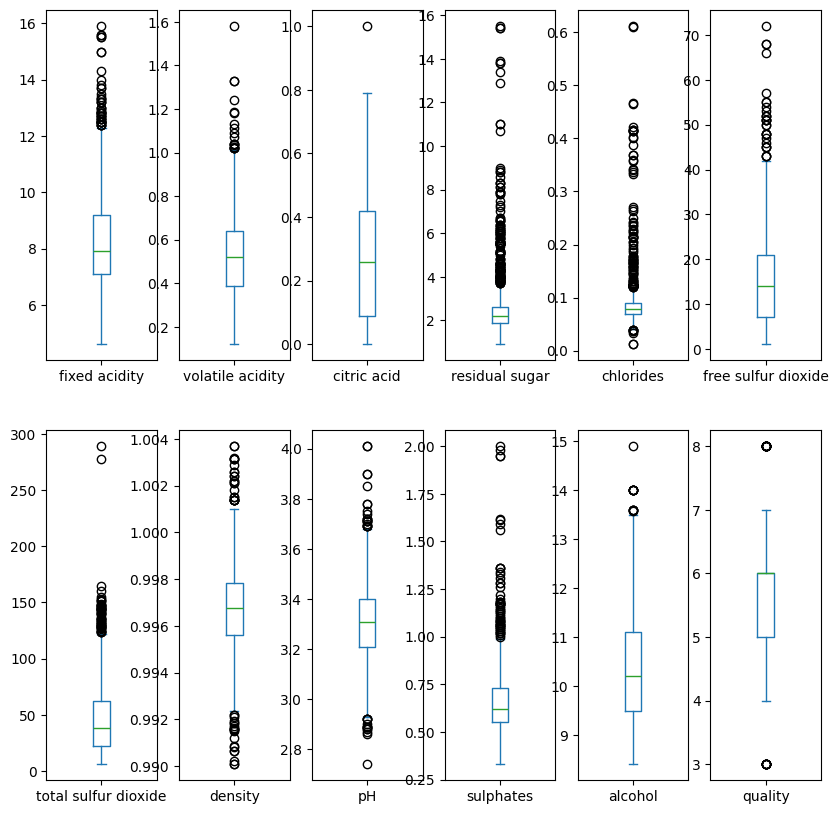

In [23]:
wQ.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

To check the distribution of skewness

<Axes: xlabel='fixed acidity', ylabel='Density'>

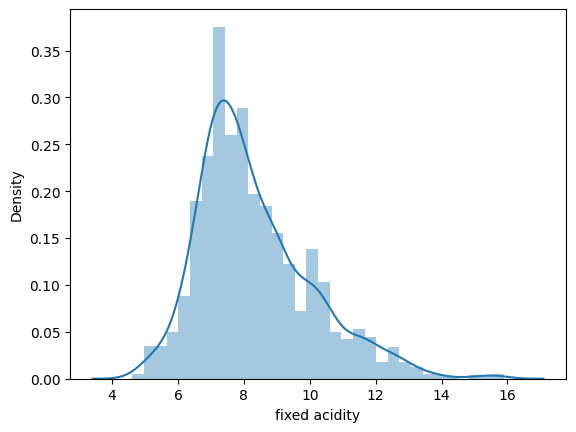

In [24]:
sns.distplot(wQ['fixed acidity'])

<Axes: xlabel='volatile acidity', ylabel='Density'>

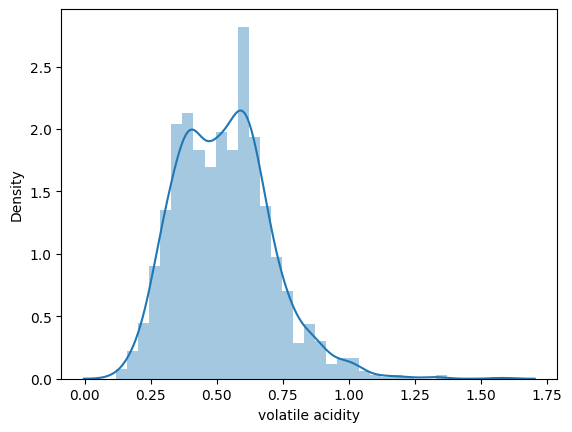

In [25]:
sns.distplot(wQ['volatile acidity'])

<Axes: xlabel='chlorides', ylabel='Density'>

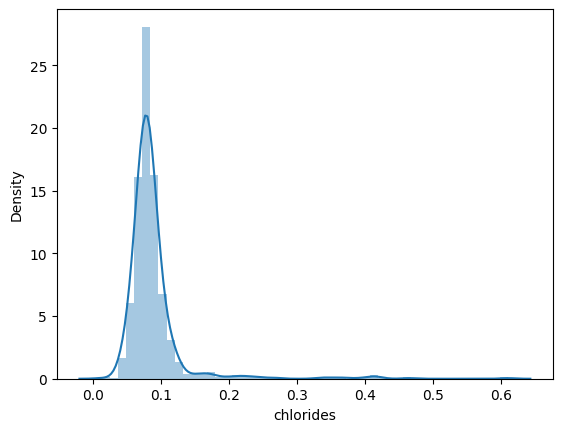

In [35]:
sns.distplot(wQ['chlorides'])

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

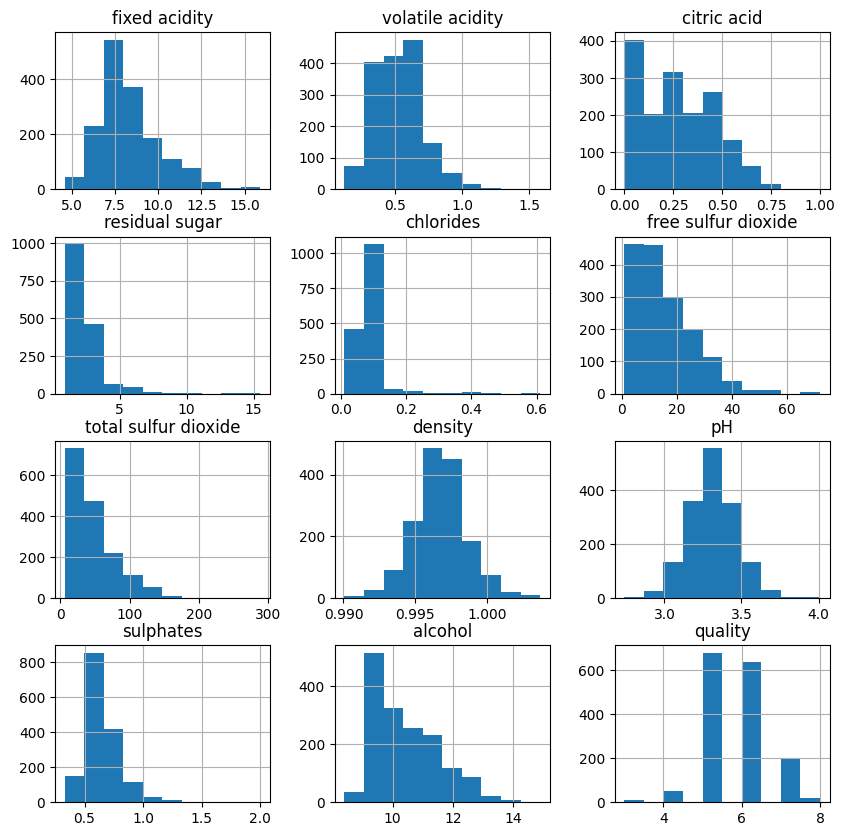

In [26]:
wQ.hist(figsize=(10,10))

<Axes: xlabel='quality', ylabel='count'>

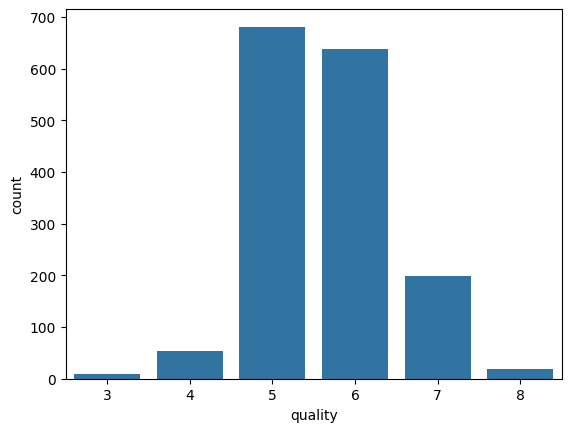

In [27]:
sns.countplot(x='quality',data=wQ)

#here from the above barplot it is clearly observed that in the quality label feature  value counts of 5 ,6 quality points are more as compared to 3,4,5,6,7,8

In [28]:
wQ['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

                        BIVARIATE ANALYSIS OF THE FEATURES

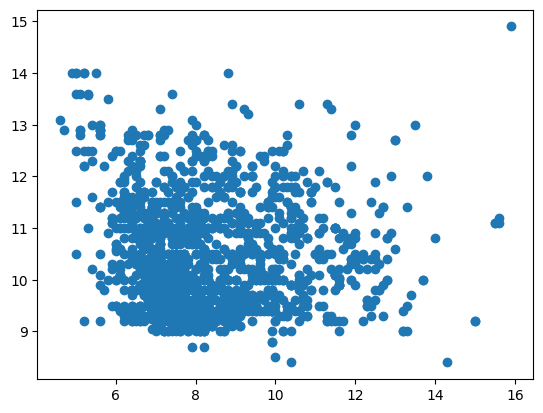

In [29]:
plt.scatter(wQ['fixed acidity'],wQ['alcohol'])

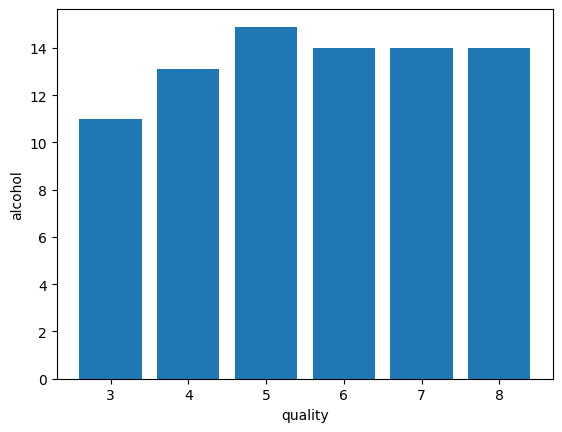

In [40]:
plt.bar(wQ['quality'],wQ['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

# here from the above bar graph it is clearly observed  that if the concentration of alcohol increases it increase the qualityy of wine 

<Axes: xlabel='quality', ylabel='fixed acidity'>

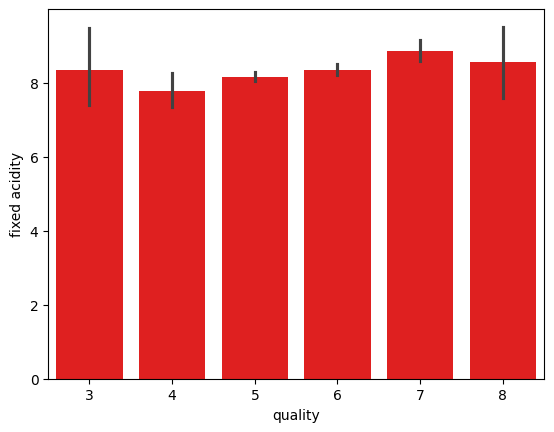

In [41]:
sns.barplot(x='quality',y='fixed acidity',data=wQ,color ='red')


# here in above barplot between label and fixed acidity feature it is clearly observed that it is following specific pattern for quality point 3 fixed acidity also increases but for quality point  4 fixed acidity decrease

<Axes: xlabel='quality', ylabel='volatile acidity'>

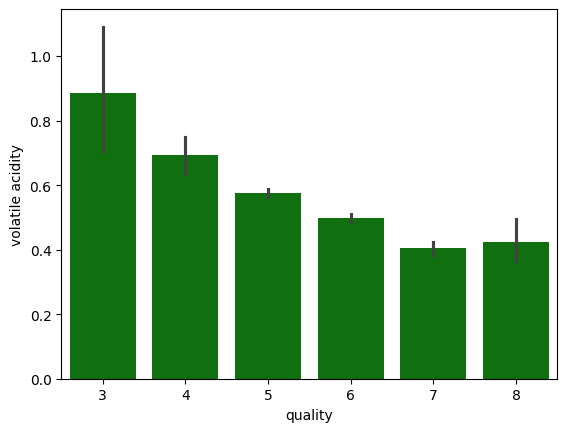

In [135]:
sns.barplot(x='quality',y='volatile acidity',data=wQ,color ='green')

# here from the observation it is clear that with increase in  volatile acidity in the wine the quality of wine will be decrease

<Axes: xlabel='quality', ylabel='citric acid'>

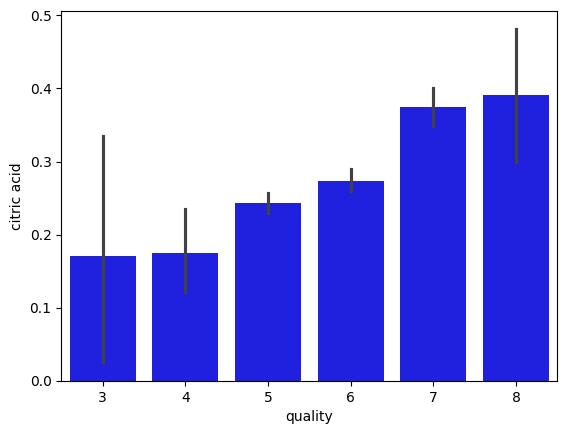

In [42]:
sns.barplot(x='quality',y='citric acid',data=wQ,color ='blue')

# here from the above observation from the label feature and citric acid it is cleary indicated that with the increase in citric acid it will also increase the quality of wine

<Axes: xlabel='quality', ylabel='residual sugar'>

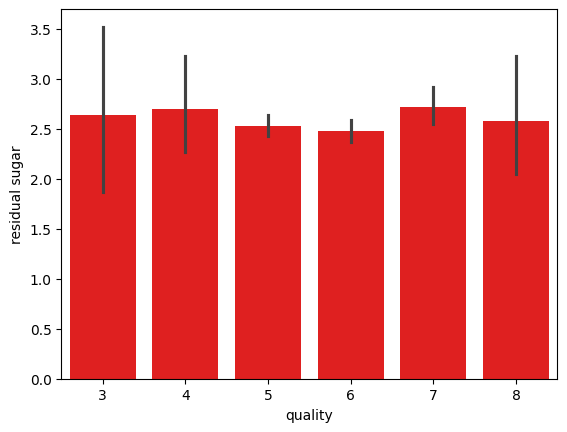

In [30]:
sns.barplot(x='quality',y='residual sugar',data=wQ,color ='red')

# here from the above observation from the label feature and residual sugar it is cleary indicated that with the increase in residual sugar component in wine it will also increase the quality of wine

<Axes: xlabel='quality', ylabel='chlorides'>

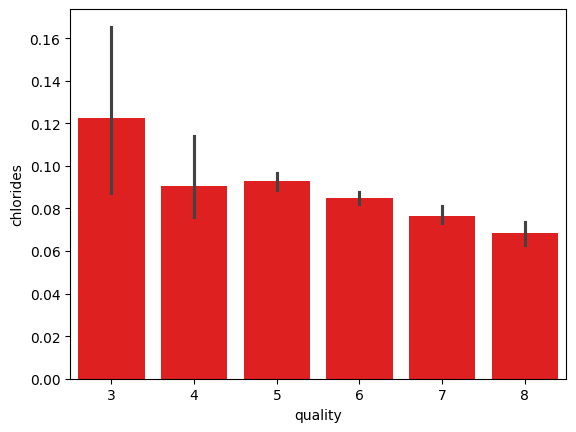

In [44]:
sns.barplot(x='quality',y='chlorides',data=wQ,color ='red')

# here from the above observation from the label feature and chlorides it is cleary indicated that with the increase in chloride composition  in wine it decreases  the quality of wine

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

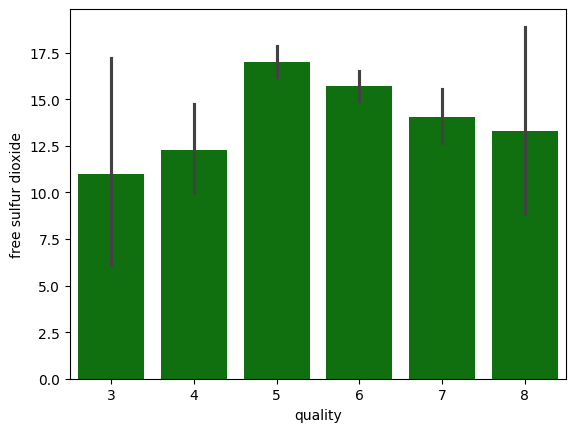

In [45]:
sns.barplot(x='quality',y='free sulfur dioxide',data=wQ,color ='green')

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

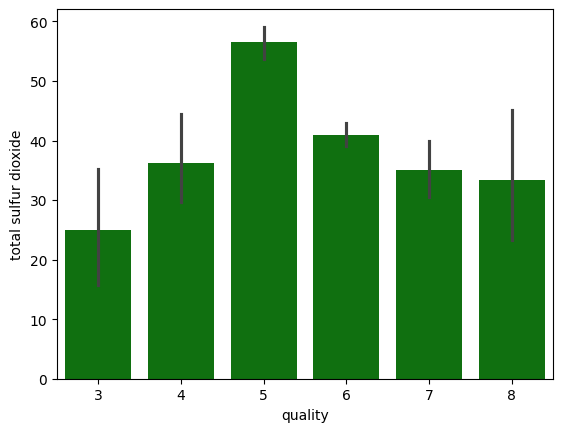

In [46]:
sns.barplot(x='quality',y='total sulfur dioxide',data=wQ,color ='green')

# here from the above bar plot it is clearly that this total sulfor dioxide composition is irrelevant composition and dont have any impact on the quality of wine . so it should be drop from the dataset 

<Axes: xlabel='quality', ylabel='density'>

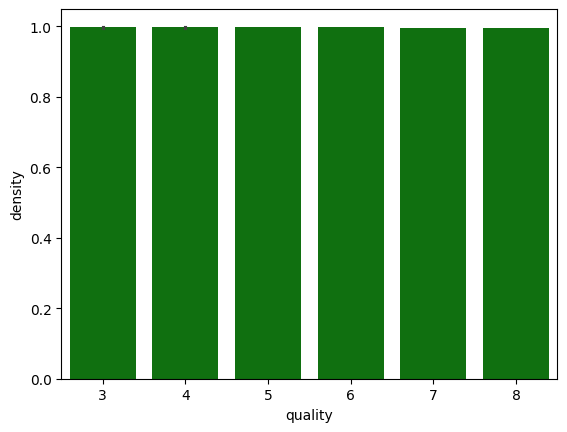

In [47]:
sns.barplot(x='quality',y='density',data=wQ,color ='green')

# here from the above observation it is clear that the density is directly proportional to the quality of wine as the density increases Quality of wine also increases

<Axes: xlabel='quality', ylabel='pH'>

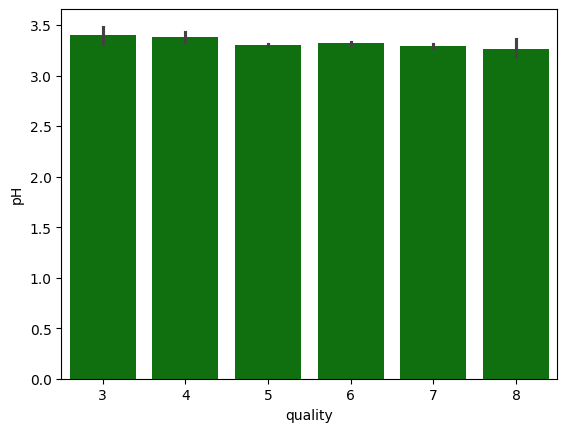

In [48]:
sns.barplot(x='quality',y='pH',data=wQ,color ='green')

<Axes: xlabel='quality', ylabel='sulphates'>

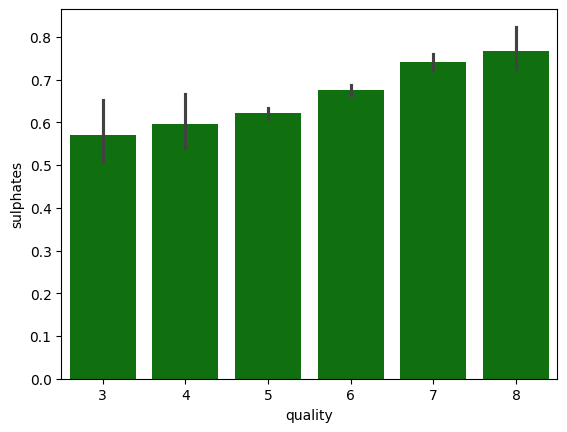

In [49]:
sns.barplot(x='quality',y='sulphates',data=wQ,color ='green')

# here from the observation it is clear that sulphate also plays a important role to increase the qulaity of wine as it is clearly showing that sulphate compostion is directly proportional to quality of wine

<Axes: xlabel='quality', ylabel='alcohol'>

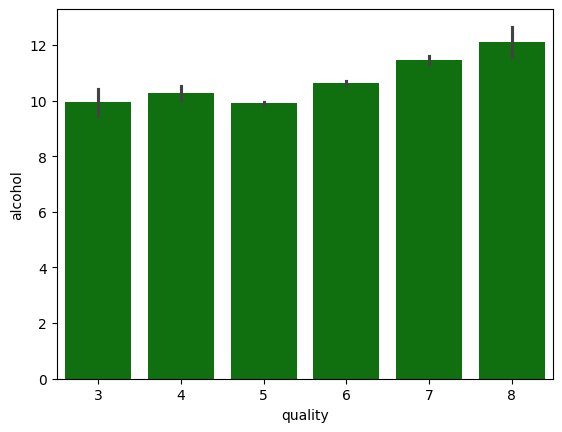

In [50]:
sns.barplot(x='quality',y='alcohol',data=wQ,color ='green')

here from the observation it is clear that alcohol also plays a important role to increase the qulaity of wine as it is clearly showing that alcohol compostion is directly proportional to quality of wine

In [31]:
correlation =wQ.corr()

<Axes: xlabel='fixed acidity', ylabel='citric acid'>

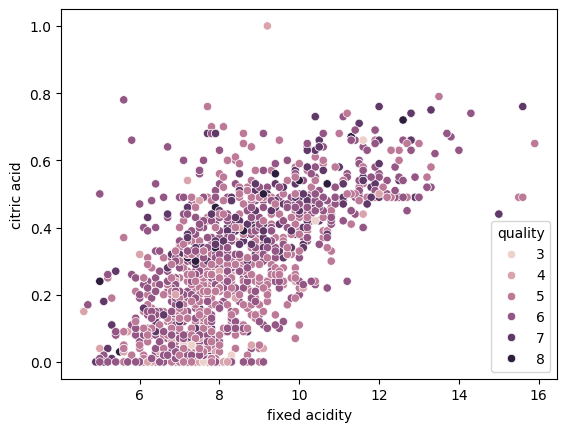

In [32]:
sns.scatterplot(data=wQ, x="fixed acidity", y="citric acid", hue="quality")

In [ ]:
# here it shows the positve correaltion between fixed acidity with citric acid with respect to output feature quality

<Axes: xlabel='fixed acidity', ylabel='alcohol'>

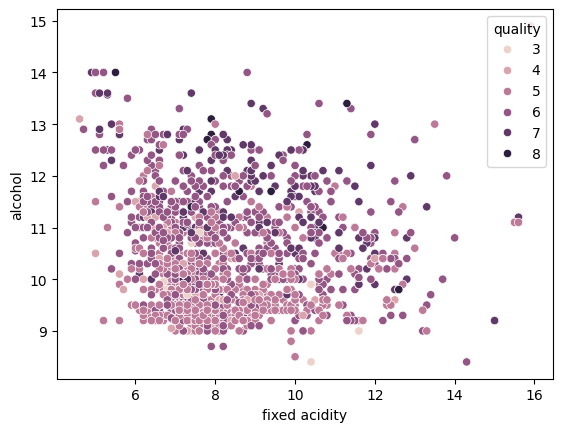

In [53]:
sns.scatterplot(data=wQ, x="fixed acidity", y="alcohol", hue="quality")

In [ ]:
#here its a negative correlation between alcohol and fixed acidity with respect to quality 

<Axes: xlabel='volatile acidity', ylabel='pH'>

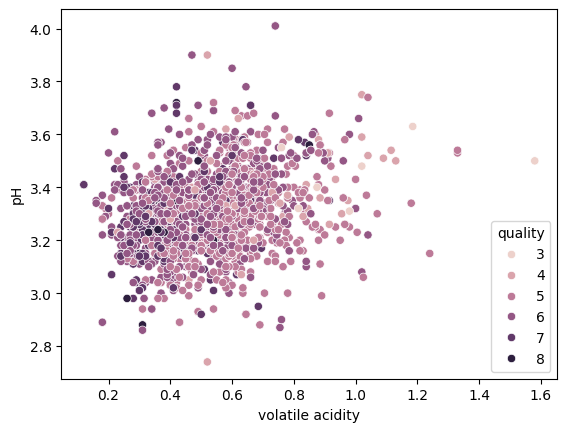

In [54]:
sns.scatterplot(data=wQ, x="volatile acidity", y="pH",hue='quality')

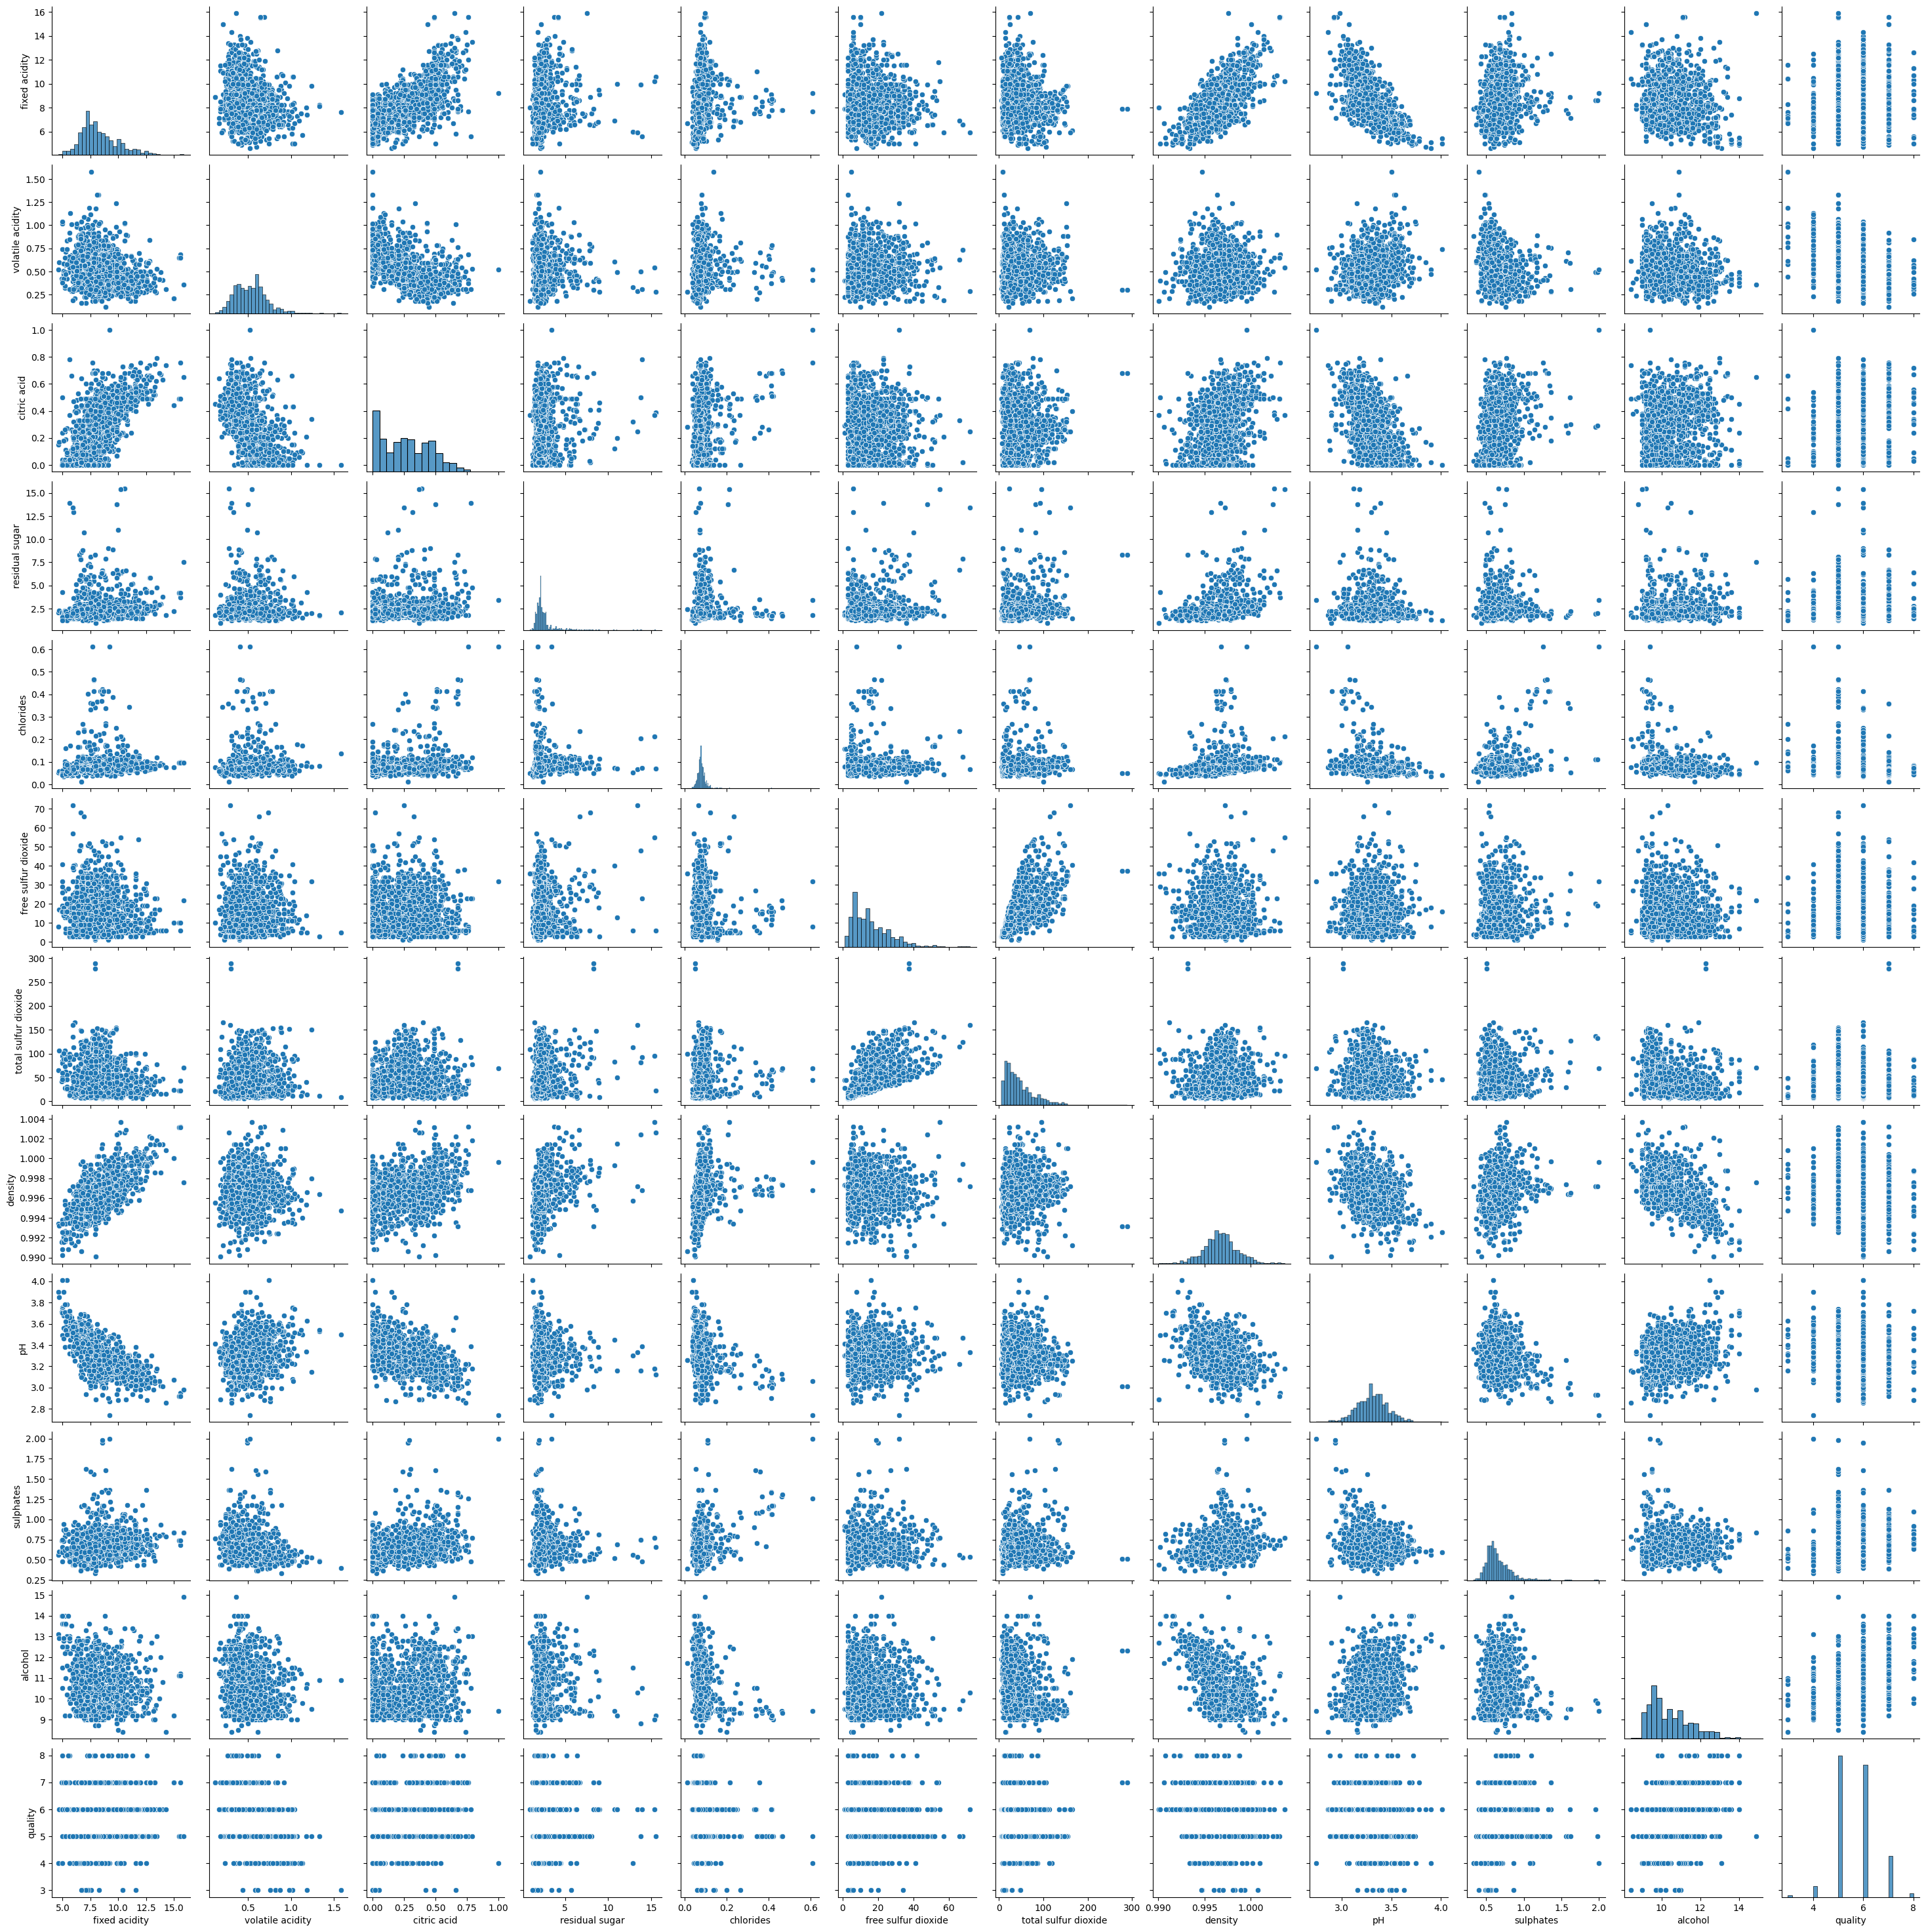

In [60]:
sns.pairplot(wQ)

In [33]:
correlation=wQ.corr()

<Axes: >

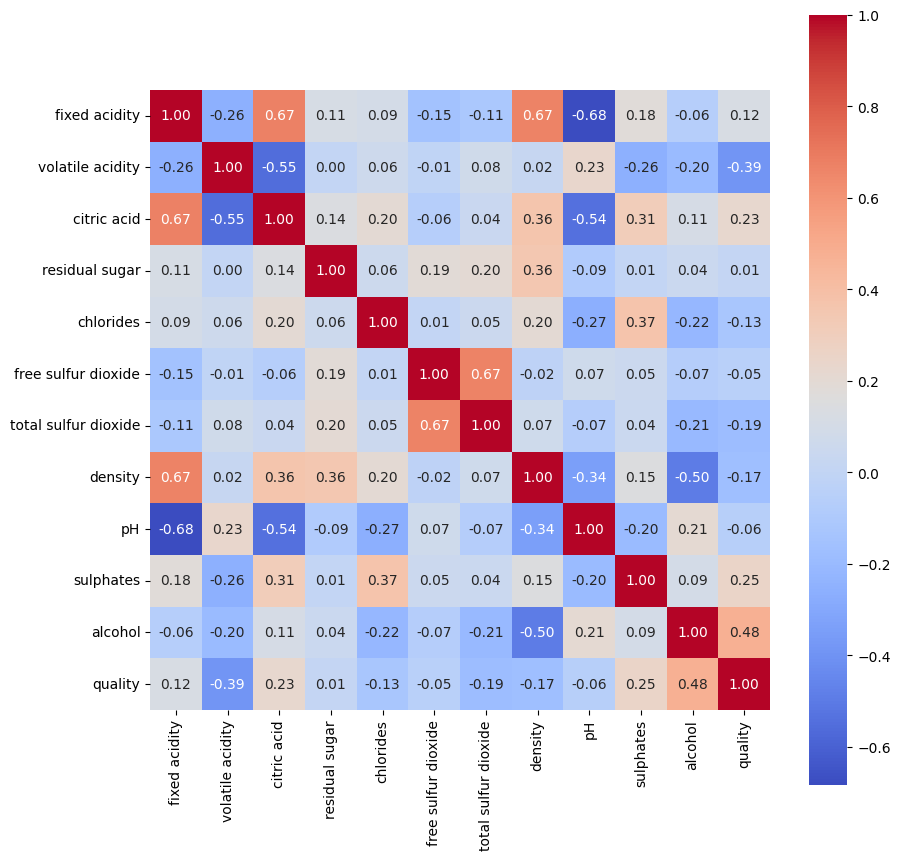

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation ,cmap='coolwarm',annot=True,fmt='.2f',cbar=True,square=True)

In [35]:
correlation['quality'].sort_values(ascending=False).drop('quality')

alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

# here from the heatmap() obsevation it is clear that the feature alcohol,sulphate ,fixed acidity,residual sugar have direct positive correlation with label feature Quality where as the feature free sulfur dioxide ,pH,chlorides ,density,total sulfor dioxides ,volatile acidity have direct negative correlation with the label feature quality
# volatile acidity feature is negative correlated with quality and dont have any impact on the quality of wine so its better to drop this feature from the dataset


#                                DATA PRE-PROCESSING

In [36]:
wQ.drop('free sulfur dioxide',axis=1,inplace=True)
 
    
    

In [ ]:
# here we are droping the volatile acidity feature from the dataset with the help of drop() method of dataframe with axis=1(column)

In [37]:
wQ.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates',
       'alcohol', 'quality'],
      dtype='object')

In [38]:
wQ.shape

(1599, 11)

In [39]:
z=np.abs(zscore(wQ))

In [40]:
print(np.where(z>3))

(array([  13,   15,   17,   17,   19,   33,   38,   42,   43,   45,   81,
         81,   83,   86,   88,   91,   92,   95,  106,  106,  109,  120,
        126,  127,  142,  144,  147,  151,  151,  151,  151,  163,  164,
        169,  169,  181,  199,  226,  226,  240,  243,  244,  258,  258,
        274,  281,  291,  324,  325,  339,  340,  347,  354,  374,  381,
        391,  396,  400,  442,  442,  451,  459,  467,  480,  480,  494,
        515,  517,  544,  554,  554,  555,  555,  557,  557,  568,  588,
        591,  595,  608,  614,  636,  639,  649,  649,  651,  652,  652,
        652,  672,  672,  684,  690,  690,  692,  692,  695,  723,  724,
        730,  754,  776,  777,  795,  821,  832,  836,  837,  889,  899,
        911,  917,  923, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079,
       1079, 1081, 1081, 1111, 1114, 1165, 1186, 1235, 1244, 1244, 1260,
       1269, 1269, 1270, 1270, 1288, 1289, 1299, 1299, 1300, 1312, 1316,
       1319, 1319, 1321, 1367, 1370, 1370, 1372, 1

In [45]:
z.iloc[19][4]

5.388529628826326

In [46]:
wQ_new=wQ[(z<3).all(axis=1)]

# here to remove the qutliers present in the dataset i have used zscore() to remove the outliers from all the feature that contain outliers 

In [157]:
wQ_new.drop('total sulfur dioxide',axis=1,inplace =True)

In [47]:
wQ_new.describe(include='all')

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1464.000000       1464.000000  1464.000000     1464.000000   
mean        8.305191          0.522852     0.264522        2.394296   
std         1.646281          0.168742     0.190896        0.869167   
min         5.000000          0.120000     0.000000        1.200000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.200000          0.630000     0.420000        2.600000   
max        13.500000          1.040000     0.790000        6.700000   

         chlorides  total sulfur dioxide      density           pH  \
count  1464.000000           1464.000000  1464.000000  1464.000000   
mean      0.081551             44.135929     0.996708     3.316257   
std       0.021205             29.711778     0.001717     0.141122   
min       0.038000              6.000000     0.991500     2.880000   
25%       0.070000             21.000000     0.995600     3.220000   
50%       0.079000             36.500000     0.996700     3.315000   
75%       0.089000             59.000000     0.997800     3.400000   
max       0.226000            145.000000     1.002200     3.750000   

         sulphates      alcohol      quality  
count  1464.000000  1464.000000  1464.000000  
mean      0.642917    10.420833     5.659153  
std       0.130215     1.022000     0.781238  
min       0.330000     8.500000     4.000000  
25%       0.550000     9.500000     5.000000  
50%       0.620000    10.200000     6.000000  
75%       0.720000    11.100000     6.000000  
max       1.160000    13.600000     8.000000

In [47]:
wQ_new.shape

(1464, 11)

In [48]:
wQ.shape

(1599, 11)

In [49]:
# here i am finding the loss percentage after removing the outliers 
loss_percent=((wQ.shape[0]-wQ_new.shape[0])/wQ.shape[0])*100

In [50]:
print(loss_percent)

8.442776735459661


In [51]:
wQ=wQ_new

In [52]:
wQ.describe(include='all')

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1464.000000       1464.000000  1464.000000     1464.000000   
mean        8.305191          0.522852     0.264522        2.394296   
std         1.646281          0.168742     0.190896        0.869167   
min         5.000000          0.120000     0.000000        1.200000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.200000          0.630000     0.420000        2.600000   
max        13.500000          1.040000     0.790000        6.700000   

         chlorides  total sulfur dioxide      density           pH  \
count  1464.000000           1464.000000  1464.000000  1464.000000   
mean      0.081551             44.135929     0.996708     3.316257   
std       0.021205             29.711778     0.001717     0.141122   
min       0.038000              6.000000     0.991500     2.880000   
25%       0.070000             21.000000     0.995600     3.220000   
50%       0.079000             36.500000     0.996700     3.315000   
75%       0.089000             59.000000     0.997800     3.400000   
max       0.226000            145.000000     1.002200     3.750000   

         sulphates      alcohol      quality  
count  1464.000000  1464.000000  1464.000000  
mean      0.642917    10.420833     5.659153  
std       0.130215     1.022000     0.781238  
min       0.330000     8.500000     4.000000  
25%       0.550000     9.500000     5.000000  
50%       0.620000    10.200000     6.000000  
75%       0.720000    11.100000     6.000000  
max       1.160000    13.600000     8.000000

In [48]:
wQ.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [72]:
wQ['residual sugar']=np.cbrt(wQ['residual sugar'])

In [73]:
wQ['chlorides']=np.cbrt(wQ['chlorides'])

In [76]:
wQ['sulphates']=np.cbrt(wQ['sulphates'])

In [77]:
wQ.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          1.831259
chlorides               1.895583
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               1.322148
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [ ]:
# now we need to perform label binarization beacuse in the label feature we have differnt category of quality points (3,4,5,6,7,8) to mmeasure the quality of wine
here we are working on classification problem usecase 
here we have to convert our label feature in two category 0 and 1 ( 0 indicates low qualitywine and 1 indicates high quality wine )


In [78]:
x=wQ.drop('quality',axis=1)

In [79]:
x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00        1.007956   0.908968   
1               7.8             0.880         0.00        1.011866   0.917567   
2               7.8             0.760         0.04        1.010336   0.915423   
3              11.2             0.280         0.56        1.007956   0.908522   
4               7.4             0.700         0.00        1.007956   0.908968   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08        1.008594   0.914678   
1595            5.9             0.550         0.10        1.009782   0.902140   
1596            6.3             0.510         0.13        1.010336   0.908968   
1597            5.9             0.645         0.12        1.008594   0.908522   
1598            6.0             0.310         0.47        1.015940   0.904735   

      total sulfur dioxide  density    pH  sulphates  alcohol  
0                     34.0  0.99780  3.51   0.824257      9.4  
1                     67.0  0.99680  3.20   0.879366      9.8  
2                     54.0  0.99700  3.26   0.866239      9.8  
3                     60.0  0.99800  3.16   0.833955      9.8  
4                     34.0  0.99780  3.51   0.824257      9.4  
...                    ...      ...   ...        ...      ...  
1594                  44.0  0.99490  3.45   0.833955     10.5  
1595                  51.0  0.99512  3.52   0.912581     11.2  
1596                  40.0  0.99574  3.42   0.908560     11.0  
1597                  44.0  0.99547  3.57   0.892112     10.2  
1598                  42.0  0.99549  3.39   0.870659     11.0  

[1599 rows x 10 columns]

In [ ]:
# here we are sepeataing the independent feature and label feature.
#All the independent feature will be stored in the variable x

In [80]:
y=wQ.iloc[:,-1:]

In [81]:
y

quality
0           5
1           5
2           5
3           6
4           5
...       ...
1594        5
1595        6
1596        6
1597        5
1598        6

[1599 rows x 1 columns]

In [55]:
from sklearn.preprocessing import StandardScaler

In [82]:
scale_data_x=StandardScaler()
x=pd.DataFrame(scale_data_x.fit_transform(x),columns=x.columns)
x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.528360          0.961877    -1.391472       -0.582273  -0.222127   
1         -0.298547          1.967442    -1.391472        0.291437   0.548194   
2         -0.298547          1.297065    -1.186070       -0.050481   0.356086   
3          1.654856         -1.384443     1.484154       -0.582273  -0.262061   
4         -0.528360          0.961877    -1.391472       -0.582273  -0.222127   
...             ...               ...          ...             ...        ...   
1594      -1.217796          0.403229    -0.980669       -0.439624   0.289360   
1595      -1.390155          0.123905    -0.877968       -0.174323  -0.833815   
1596      -1.160343         -0.099554    -0.723916       -0.050481  -0.222127   
1597      -1.390155          0.654620    -0.775267       -0.439624  -0.262061   
1598      -1.332702         -1.216849     1.021999        1.201501  -0.601345   

      total sulfur dioxide   density        pH  sulphates   alcohol  
0                -0.379133  0.558274  1.288643  -0.601783 -0.960246  
1                 0.624363  0.028261 -0.719933   0.221852 -0.584777  
2                 0.229047  0.134264 -0.331177   0.025664 -0.584777  
3                 0.411500  0.664277 -0.979104  -0.456840 -0.584777  
4                -0.379133  0.558274  1.288643  -0.601783 -0.960246  
...                    ...       ...       ...        ...       ...  
1594             -0.075043 -0.978765  0.899886  -0.456840  0.072294  
1595              0.137820 -0.862162  1.353436   0.718264  0.729364  
1596             -0.196679 -0.533554  0.705508   0.658180  0.541630  
1597             -0.075043 -0.676657  1.677400   0.412352 -0.209308  
1598             -0.135861 -0.666057  0.511130   0.091718  0.541630  

[1599 rows x 10 columns]

In [83]:
print(x)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.528360          0.961877    -1.391472       -0.582273  -0.222127   
1         -0.298547          1.967442    -1.391472        0.291437   0.548194   
2         -0.298547          1.297065    -1.186070       -0.050481   0.356086   
3          1.654856         -1.384443     1.484154       -0.582273  -0.262061   
4         -0.528360          0.961877    -1.391472       -0.582273  -0.222127   
...             ...               ...          ...             ...        ...   
1594      -1.217796          0.403229    -0.980669       -0.439624   0.289360   
1595      -1.390155          0.123905    -0.877968       -0.174323  -0.833815   
1596      -1.160343         -0.099554    -0.723916       -0.050481  -0.222127   
1597      -1.390155          0.654620    -0.775267       -0.439624  -0.262061   
1598      -1.332702         -1.216849     1.021999        1.201501  -0.601345   

      total sulfur dioxide 

# here we have normalised all the independent fetaure of the dataset with the value between 0 and 1 
# scaling technique is necessary because in all the independent features data will be stored in different scale so to improve the perormnace of the model we need to convert the data into same scale for all independent feature

In [84]:

x.value_counts()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  total sulfur dioxide  density    pH         sulphates  alcohol  
-0.470907      -0.099554         -1.288771    -0.891287        0.080257  -0.470360             -0.724359   0.316751  -0.750220   0.072294    4
-0.930531      -0.378878         -0.159061    -0.891287       -0.182695  -0.379133             -1.031767   0.511130  -0.315192   0.166161    4
-0.643266      -0.937525          0.970649    -0.303853       -0.302511  -0.075043             -0.745559   0.575922   1.236693   0.541630    4
                0.933944         -0.723916    -0.439624       -0.222127  -0.804858             -0.681958  -0.136798  -0.750220  -0.303175    4
-0.011282       0.682553         -0.877968     0.596412        0.255460  -0.196679              0.680178  -0.136798  -0.675552  -0.866379    3
                                                                                                                                            ..
-0.4

In [85]:
y

quality
0           5
1           5
2           5
3           6
4           5
...       ...
1594        5
1595        6
1596        6
1597        5
1598        6

[1599 rows x 1 columns]

# now after seperating independent feature in the variable x and dependent feature in variable y then we need to perform label binarization
# here it is clearly observed that in the output feature we multiple category of quality points so here we need to convert it only in two category 0 (bad quality) 1(good quality)


In [86]:
y_value=y['quality'].apply(lambda x: 1 if x>=7 else 0)

#here i have converted label feature into two category 0 and 1 by applying lambda fuction to each value of the label feature and in  the lambda function we have checked that if the quality value is greater than 7 then it gives value 1 (i assumed 1 as good quality wine ) and 0 as bad quality wine

In [87]:
y_value.value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

In [88]:
y=y_value

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

vif values              features
0    7.851337         fixed acidity
1    1.733880      volatile acidity
2    2.947006           citric acid
3    2.014852        residual sugar
4    1.449677             chlorides
5    1.228193  total sulfur dioxide
6    7.507681               density
7    3.306074                    pH
8    1.371727             sulphates
9    3.492790               alcohol

#here from the above observation of VIF values density featuere has highest correlation so we need to drop that feature and then again will check for collinearity

In [70]:
x.drop('density',axis=1,inplace=True)

In [90]:
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

vif values              features
0    7.851337         fixed acidity
1    1.733880      volatile acidity
2    2.947006           citric acid
3    2.014852        residual sugar
4    1.449677             chlorides
5    1.228193  total sulfur dioxide
6    7.507681               density
7    3.306074                    pH
8    1.371727             sulphates
9    3.492790               alcohol

In [ ]:
# here now after removing density from the data set we observed that vif values has been reduced 

In [91]:
y.value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

In [ ]:
#here in the above code we have seen the imbalance of the data in two category so we required to balance the dataset uisng SMOTE(synthetical majority over sampling technique)

In [92]:
from imblearn.over_sampling import SMOTE

In [93]:
smt=SMOTE()
x1,y1=smt.fit_resample(x,y)


In [94]:
y1.value_counts()

quality
0    1382
1    1382
Name: count, dtype: int64

In [ ]:
#here from the above observation it is clear that now the label feature has balanced dataset 

In [95]:
x1.value_counts()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  total sulfur dioxide  density    pH         sulphates  alcohol  
-0.643266      -0.937525          0.970649    -0.303853       -0.302511  -0.075043             -0.745559   0.575922   1.236693   0.541630    23
 0.333436      -2.278280          0.919299    -0.732539       -0.262061  -0.774449             -0.650157   0.640715   0.718264   1.386435    11
 0.620701      -1.440308          1.330102     0.068152       -0.302511  -0.865676             -0.289747  -0.719933   2.646246   1.480302     8
 0.448342      -1.328579          0.303093    -0.370921       -0.785911  -0.591995             -0.840962  -0.331177   1.180955   1.198701     8
-0.585813      -0.267148          0.251743    -0.303853       -0.833815   0.229047              0.282667  -0.072005   0.025664  -0.397043     8
                                                                                                                                             .

In [96]:
y1.value_counts()

quality
0    1382
1    1382
Name: count, dtype: int64

In [ ]:
#here from the above observation it is clear that now the label feature has balanced dataset 

In [ ]:
                    MODEL BUILDING PART HAS BEEN initiated 

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,auc,roc_auc_score

In [98]:
maxac=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred=RFC.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxac:
        maxac=acc
        maxRS=i
print('best accuracy',maxac,"at random state",maxRS)


best accuracy 0.9602409638554217 at random state 135


In [99]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       391
           1       0.93      0.94      0.94       439

    accuracy                           0.93       830
   macro avg       0.93      0.93      0.93       830
weighted avg       0.93      0.93      0.93       830



here from the above report it is clear that for the class 0 that is bad quality wine it supports 351 data points and for class 1 (good quality wine) it supports 406 data points
recall or sensitivity is 93% for class 0 and 94 percent for class 1 .
f1 score is 91% gives us the overall perfromance of the model and it is the harmonic mean of recall and precision that is the two most important evaluation  metrics for classification problem


In [100]:
c_matrix=confusion_matrix(y_test,pred)
print(c_matrix)

[[361  30]
 [ 26 413]]


 here from the above observation it is clear that TPR is 347 means model has predicted 347 data points as good quality wine and 365 data points as TNR it means model has predicted bas quality wine

Text(45.722222222222214, 0.5, 'actual value')

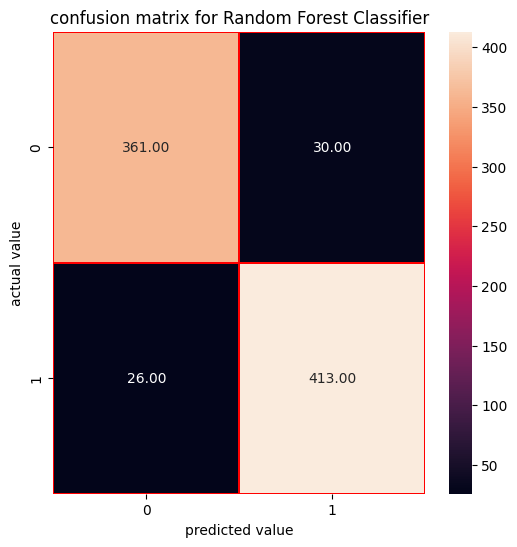

In [101]:
                    #printing confusion matrics using heatmap()
x_labels=['0','1']
y_labels=['0','1']
plt.figure(figsize=(6,6))
sns.heatmap(c_matrix,annot=True,linewidth=0.2,linecolor='red',fmt='.2f')
plt.title('confusion matrix for Random Forest Classifier')
plt.xlabel('predicted value')
plt.ylabel('actual value')


In [156]:
def classification_models(model,x,y,x_test,y_test):
     
    model.fit(x,y)
    pred=model.predict(x_test)
    print(accuracy_score(y_test,pred))
    c_matrix=confusion_matrix(y_test,pred)
    print(c_matrix)
    print(classification_report(y_test,pred))
    x_labels=['0','1']
    y_labels=['0','1']
    plt.figure(figsize=(6,6))
    sns.heatmap(c_matrix,annot=True,linewidth=0.2,linecolor='red',fmt='.2f')
    plt.xlabel('predicted value')
    plt.ylabel('actual value')


   
    

0.8156626506024096
[[320  71]
 [ 82 357]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       391
           1       0.83      0.81      0.82       439

    accuracy                           0.82       830
   macro avg       0.82      0.82      0.82       830
weighted avg       0.82      0.82      0.82       830



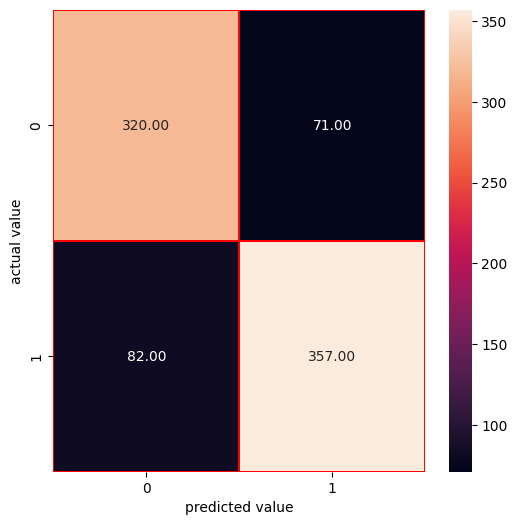

In [157]:
LR=LogisticRegression()
classification_models(LR,x_train,y_train,x_test,y_test)

0.8722891566265061
[[339  52]
 [ 54 385]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       391
           1       0.88      0.88      0.88       439

    accuracy                           0.87       830
   macro avg       0.87      0.87      0.87       830
weighted avg       0.87      0.87      0.87       830



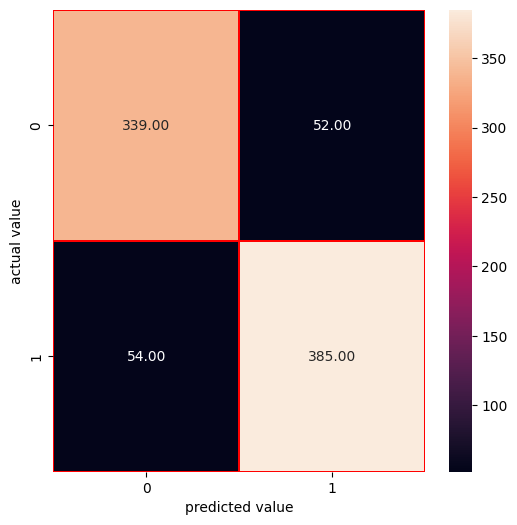

In [158]:
svc=SVC()
classification_models(svc,x_train,y_train,x_test ,y_test)

0.9481927710843373
[[365  26]
 [ 17 422]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       391
           1       0.94      0.96      0.95       439

    accuracy                           0.95       830
   macro avg       0.95      0.95      0.95       830
weighted avg       0.95      0.95      0.95       830



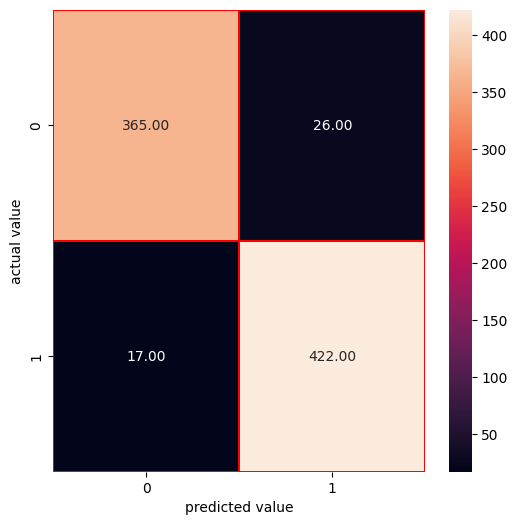

In [159]:
etc=ExtraTreesClassifier()
classification_models(etc,x_train,y_train,x_test,y_test)

0.8987951807228916
[[345  46]
 [ 38 401]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       391
           1       0.90      0.91      0.91       439

    accuracy                           0.90       830
   macro avg       0.90      0.90      0.90       830
weighted avg       0.90      0.90      0.90       830



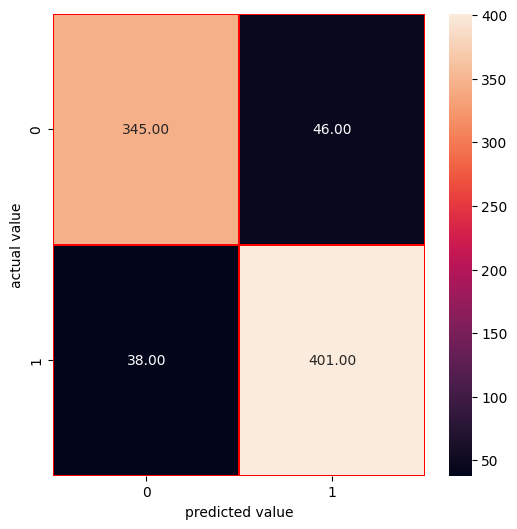

In [160]:
gbc=GradientBoostingClassifier()
classification_models(gbc,x_train,y_train,x_test,y_test)

0.9108433734939759
[[355  36]
 [ 38 401]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       391
           1       0.92      0.91      0.92       439

    accuracy                           0.91       830
   macro avg       0.91      0.91      0.91       830
weighted avg       0.91      0.91      0.91       830



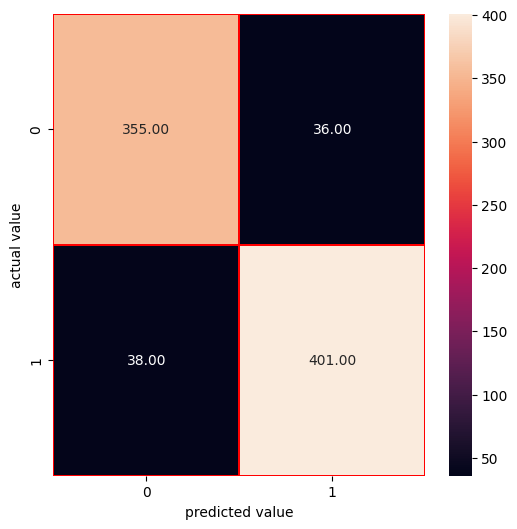

In [161]:
bgc=BaggingClassifier()
classification_models(bgc,x_train,y_train,x_test,y_test)

0.8939759036144578
[[344  47]
 [ 41 398]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       391
           1       0.89      0.91      0.90       439

    accuracy                           0.89       830
   macro avg       0.89      0.89      0.89       830
weighted avg       0.89      0.89      0.89       830



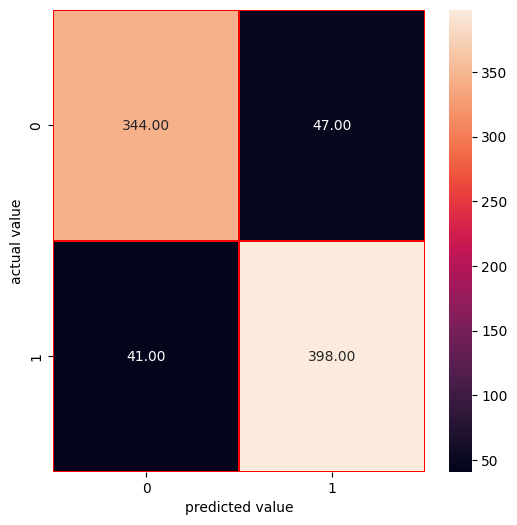

In [108]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
classification_models(dtc,x_train,y_train,x_test,y_test)

In [163]:
def cross_validation(model,x1,y1):
    pred=model.predict(x_test)
    score=cross_val_score(model,x1,y1)
    print(score)
    print(score.mean())
    print('differnce between accuracy score and cross validation is',accuracy_score(y_test,pred)-score.mean())

In [164]:
# checking cross_val score for Logistic Regression
cross_validation(LR,x1,y1)

[0.87703436 0.75768535 0.84086799 0.71790235 0.8134058 ]
0.8013791702701993
differnce between accuracy score and cross validation is 0.014283480332210274


In [165]:
# checking cross_validation score for Random Forest Classifer
cross_validation(RFC,x1,y1)

[0.95117541 0.88245931 0.9403255  0.86980108 0.92210145]
0.9131725502529026
differnce between accuracy score and cross validation is 0.01935757022902518


In [166]:
#checking cross validation for ExtraTreesClassifier
cross_validation(etc,x1,y1)

[0.96745027 0.89511754 0.96202532 0.87341772 0.94565217]
0.9287326047645255
differnce between accuracy score and cross validation is 0.019460166319811845


In [167]:
#checking cross validation for GradientBoostingClassifier
cross_validation(gbc,x1,y1)

[0.90777577 0.85533454 0.90958409 0.80650995 0.86956522]
0.8697539114710278
differnce between accuracy score and cross validation is 0.02904126925186379


In [168]:
# checking cross validaton for decision tree classifer
cross_validation(dtc,x1,y1)

[0.88607595 0.86980108 0.91139241 0.84629295 0.88224638]
0.8791617527583405
differnce between accuracy score and cross validation is 0.014814150856117259


# here in the above cross validation observtion among different classification algothim we have seen that RandomForestClassifier has mean accuracy of  94%  and ExtraTreesClassifier h mean accuracay of 93% as compared to other classification algorithms also the differnce between the mean accuracy and cross validation of RandomForestClassifier is very less as compared to ExtraTreesClasifier  so we will RandomForestClassifier  algorith for our usecase so that it gives us higher performance and acurate predictions


In [144]:
I have selected RandomForestClassifier Algorithm as high performing model from the above observation for my this project use case 

In [ ]:
# now i am performing Hyper parameter tuning for my selected model

In [115]:
from sklearn.model_selection import GridSearchCV

In [116]:
parameters={'criterion':['gini','entropy'],'random_state':[10,30,50,60,900],'max_depth':[0,10,20,30,40],'n_jobs':[-3,-2,-1,1,2],'n_estimators':[50,100,150,200,250]}

In [117]:

gcv=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [ ]:
gcv.fit(x_train,y_train)

In [ ]:
gcv.best_params_

In [144]:
#final_model=RandomForestClassifier()
#final_model=RandomForestClassifier(criterion='entropy',max_depth=50,n_estimators=500,n_jobs=-3,random_state=100)
final_model=RandomForestClassifier(criterion='entropy',max_depth=50,n_estimators=500,n_jobs=-3,random_state=135)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
accuracy=accuracy_score(y_test,pred)
print(accuracy*100)

93.13253012048193


In [145]:
final_model1=ExtraTreesClassifier()
#final_model1=ExtraTreesClassifier(criterion='gini',max_depth=40,n_estimators=250,n_jobs=-3,random_state=30)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
accuracy=accuracy_score(y_test,pred)
print(accuracy*100)

93.13253012048193


In [ ]:
final_model2=DecisionTreeClassifier()
#final_model1=ExtraTreesClassifier(criterion='gini',max_depth=40,n_estimators=250,n_jobs=-3,random_state=30)
final_model2.fit(x_train,y_train)
pred=final_model.predict(x_test)
accuracy=accuracy_score(y_test,pred)
print(accuracy*100)

In [ ]:
                                    AUC ROC

In [147]:
from sklearn import metrics

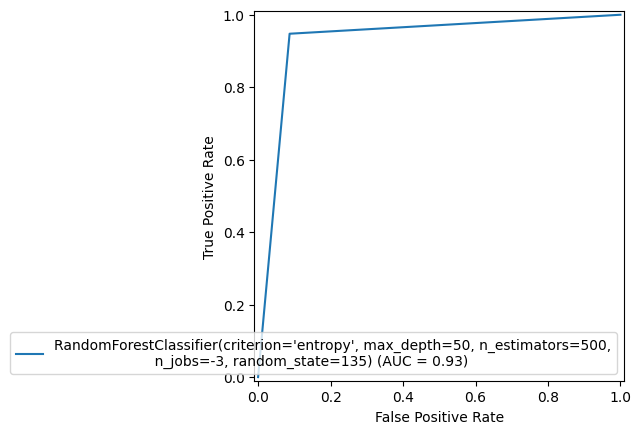

In [148]:
fpr,tpr,threshold=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
disp=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final_model)
disp.plot()

In [ ]:
                    SAVING THE MODEL using joblib library

In [149]:
import joblib
joblib.dump(final_model,'Red_Wine_Quality_project.pkl')

['Red_Wine_Quality_project.pkl']

In [ ]:
                    Predicting the saved Model

In [150]:
model=joblib.load('Red_wine_Quality_project.pkl')

In [151]:
prediction=model.predict(x_test)
prediction

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,

In [152]:
dummy_test=np.array(y_test)
#dummy_test=np.array([7.9,0.6,0.06,1.6,0.069,15.0,59.0,0.9964,3.3,0.46,9.4])

In [155]:
df=pd.DataFrame()
df['predicted']=prediction
df['orignal']=dummy_test
df
df.iloc[650:700]

predicted  orignal
650          1        1
651          0        0
652          0        0
653          1        1
654          0        0
655          0        0
656          1        1
657          1        1
658          1        1
659          0        1
660          1        1
661          1        0
662          0        0
663          1        1
664          0        0
665          0        0
666          0        0
667          1        1
668          0        0
669          0        0
670          0        0
671          0        0
672          1        1
673          0        0
674          0        0
675          1        1
676          1        1
677          1        1
678          1        1
679          0        0
680          1        1
681          1        1
682          1        1
683          1        1
684          0        0
685          0        1
686          1        1
687          0        0
688          1        1
689          1        1
690          1        1
691          1        1
692          0        0
693          1        0
694          1        1
695          0        0
696          1        1
697          0        0
698          1        1
699          1        1